Dont forget to normalise the data (he guesses boosted trees will be the best)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


In [2]:
nutrition = pd.read_pickle("./nutrition_data_clean.pkl")
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


Initially i want to ignore any collumns on carbon and just try to get a price predictor.

In [3]:
#cutting collumns 6 to 11
nutrition.drop(nutrition.columns[6:12], axis=1, inplace=True)
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [4]:
#Cutting branded collumn(probably better to keep this and turn into 1s and 0s maybe)
nutrition.drop(nutrition.columns[2], axis=1, inplace=True)

In [47]:
nutrition.dropna(inplace=True) #getting rid of na values.

In [52]:
nutrition.drop(nutrition.columns[0:2], axis=1, inplace=True)

In [53]:
nutrition

,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,1.70,260.0,0.653846,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,1.50,567.0,0.264550,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,1.50,567.0,0.264550,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,1.50,567.0,0.264550,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,1.50,567.0,0.264550,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...
1218,0.90,85.0,1.058824,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,1.00,400.0,0.250000,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,3.75,500.0,0.750000,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,0.41,1000.0,0.041000,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


In [56]:
# normalise the data by feature column
from sklearn import preprocessing
norm_data = preprocessing.normalize(nutrition, axis=0) #collum instead of row
norm_data = pd.DataFrame(norm_data, columns = nutrition.columns) # processing loses columns headers so these must be reestablished
norm_data

,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.011348,0.009053,0.002810,0.035649,0.019225,0.009091,0.042721,0.039173,0.006676,0.000000,0.015184
1,0.010013,0.019743,0.001137,0.029491,0.015728,0.013783,0.032828,0.007893,0.010491,0.006927,0.008867
2,0.010013,0.019743,0.001137,0.033380,0.016189,0.015543,0.038698,0.008095,0.012398,0.006003,0.010629
3,0.010013,0.019743,0.001137,0.031220,0.016035,0.014496,0.035316,0.008261,0.011445,0.007388,0.009610
4,0.010013,0.019743,0.001137,0.032192,0.016905,0.014056,0.036315,0.009252,0.011445,0.007388,0.007382
...,...,...,...,...,...,...,...,...,...,...,...
1184,0.006008,0.002960,0.004551,0.026035,0.017332,0.003477,0.032469,0.035061,0.013829,0.000000,0.007041
1185,0.006675,0.013928,0.001075,0.002053,0.000461,0.002912,0.003023,0.001303,0.014783,0.000000,0.000248
1186,0.025031,0.017410,0.003224,0.010371,0.011668,0.010955,0.003455,0.003469,0.005722,0.003232,0.006943
1187,0.002737,0.034821,0.000176,0.022470,0.026782,0.002556,0.013731,0.020615,0.010968,0.004156,0.011456


In [57]:
nutrition = norm_data

In [58]:
# Importing the dataset
X = nutrition.iloc[:, 5:].values
y = nutrition.iloc[:, 4].values
X, y

(array([[0.00909113, 0.04272089, 0.03917332, 0.00667608, 0.        ,
         0.01518407],
        [0.01378333, 0.03282839, 0.00789341, 0.01049098, 0.00692657,
         0.00886749],
        [0.01554291, 0.03869831, 0.00809533, 0.01239843, 0.00600303,
         0.01062885],
        ...,
        [0.01095545, 0.00345478, 0.00346943, 0.00572235, 0.0032324 ,
         0.00694262],
        [0.00255557, 0.01373114, 0.02061464, 0.01096784, 0.00415594,
         0.01145579],
        [0.00477599, 0.01143596, 0.00813204, 0.00953725, 0.        ,
         0.00113997]]),
 array([0.01922512, 0.0157281 , 0.01618868, ..., 0.01166813, 0.02678212,
        0.00208116]))

In [59]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [60]:
nn = MLPRegressor(random_state = 1, max_iter=500).fit(X_train, y_train)

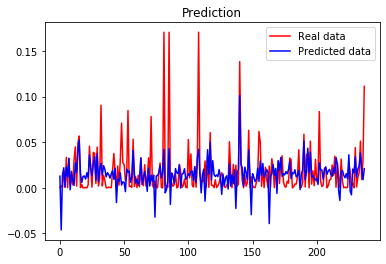

In [61]:
#validation curve
y_pred = nn.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#loss curve
#learning curve

Regression https://scikit-learn.org/stable/modules/model_evaluation.html

In [62]:
from sklearn import metrics 

In [63]:
#‘explained_variance’, best possible score is one lower values are worse
metrics.explained_variance_score(y_test, y_pred)

0.25179288304939296

In [64]:
#‘max_error’ best case is zero but unlikely in the real world
metrics.max_error(y_test, y_pred)

0.12838605353627364

In [65]:
#Mean absolute error regression loss.
metrics.mean_absolute_error(y_test, y_pred)

0.015120427909007876

In [66]:
#Mean squared error regression loss.
metrics.mean_squared_error(y_test, y_pred)

0.0005530507426010309

In [67]:
#Median absolute error regression loss.
#The best value is 0.0
metrics.median_absolute_error(y_test, y_pred)

0.0116423472503412

In [68]:
#r2 
#Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). 
#A constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.
metrics.r2_score(y_test, y_pred)

0.24361780301884695